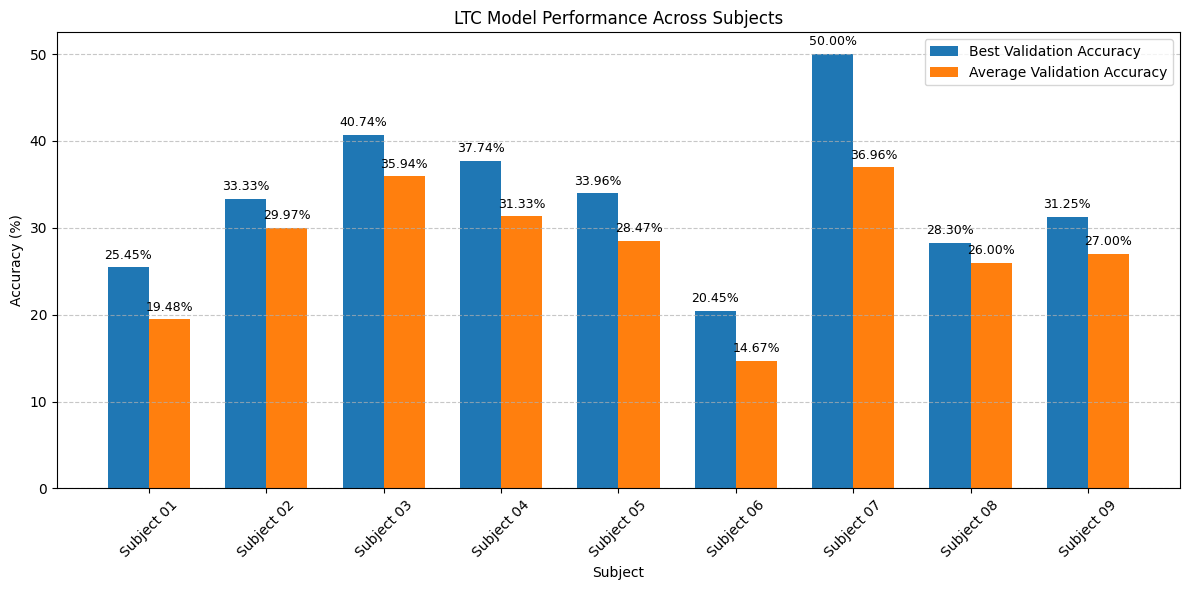

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Create a DataFrame from your results
data = {
    'Subject': [f'Subject {i:02d}' for i in range(1, 10)],
    'Best Accuracy': [25.45, 33.33, 40.74, 37.74, 33.96, 20.45, 50.00, 28.30, 31.25],
    'Average Accuracy': [19.48, 29.97, 35.94, 31.33, 28.47, 14.67, 36.96, 26.00, 27.00],
    'Epochs': [28, 27, 27, 43, 23, 22, 24, 23, 25]
}

df = pd.DataFrame(data)

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
x = np.arange(len(df['Subject']))
width = 0.35

plt.bar(x - width/2, df['Best Accuracy'], width, label='Best Validation Accuracy')
plt.bar(x + width/2, df['Average Accuracy'], width, label='Average Validation Accuracy')

plt.xlabel('Subject')
plt.ylabel('Accuracy (%)')
plt.title('LTC Model Performance Across Subjects')
plt.xticks(x, df['Subject'], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for i, v in enumerate(df['Best Accuracy']):
    plt.text(i - width/2, v + 1, f'{v:.2f}%', ha='center', fontsize=9)
    
for i, v in enumerate(df['Average Accuracy']):
    plt.text(i + width/2, v + 1, f'{v:.2f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('ltc_performance_comparison.png', dpi=300)
plt.show()


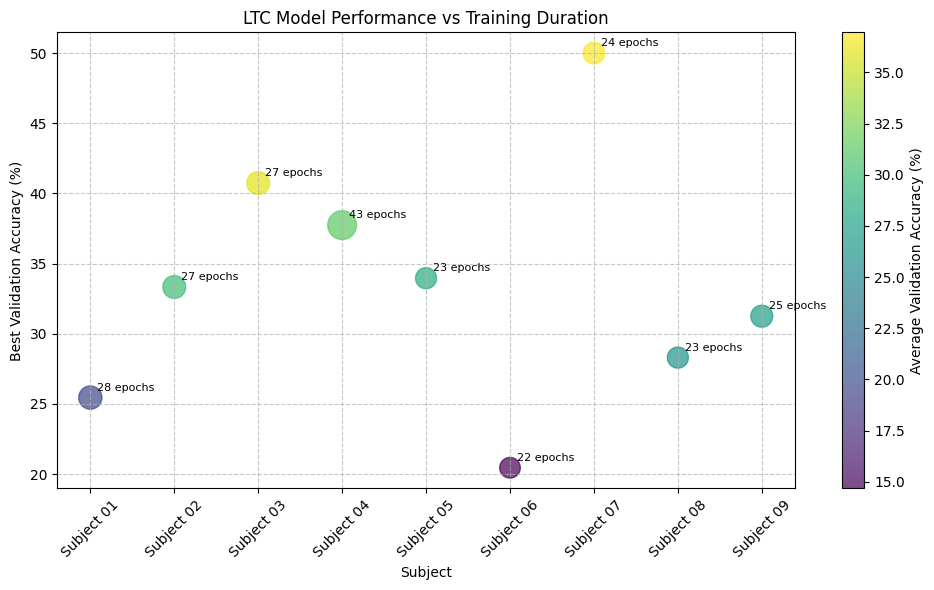

In [2]:
# Create a scatter plot with sizes proportional to epochs
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Subject'], df['Best Accuracy'], 
                     s=df['Epochs']*10, # Size based on epochs
                     c=df['Average Accuracy'], # Color based on avg accuracy
                     cmap='viridis', 
                     alpha=0.7)

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Average Validation Accuracy (%)')

# Customize the plot
plt.xlabel('Subject')
plt.ylabel('Best Validation Accuracy (%)')
plt.title('LTC Model Performance vs Training Duration')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add size legend for epochs
for i, epochs in enumerate(df['Epochs']):
    plt.annotate(f"{epochs} epochs", 
                xy=(df['Subject'][i], df['Best Accuracy'][i]),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=8)

plt.tight_layout()
plt.savefig('ltc_accuracy_epochs.png', dpi=300)
plt.show()


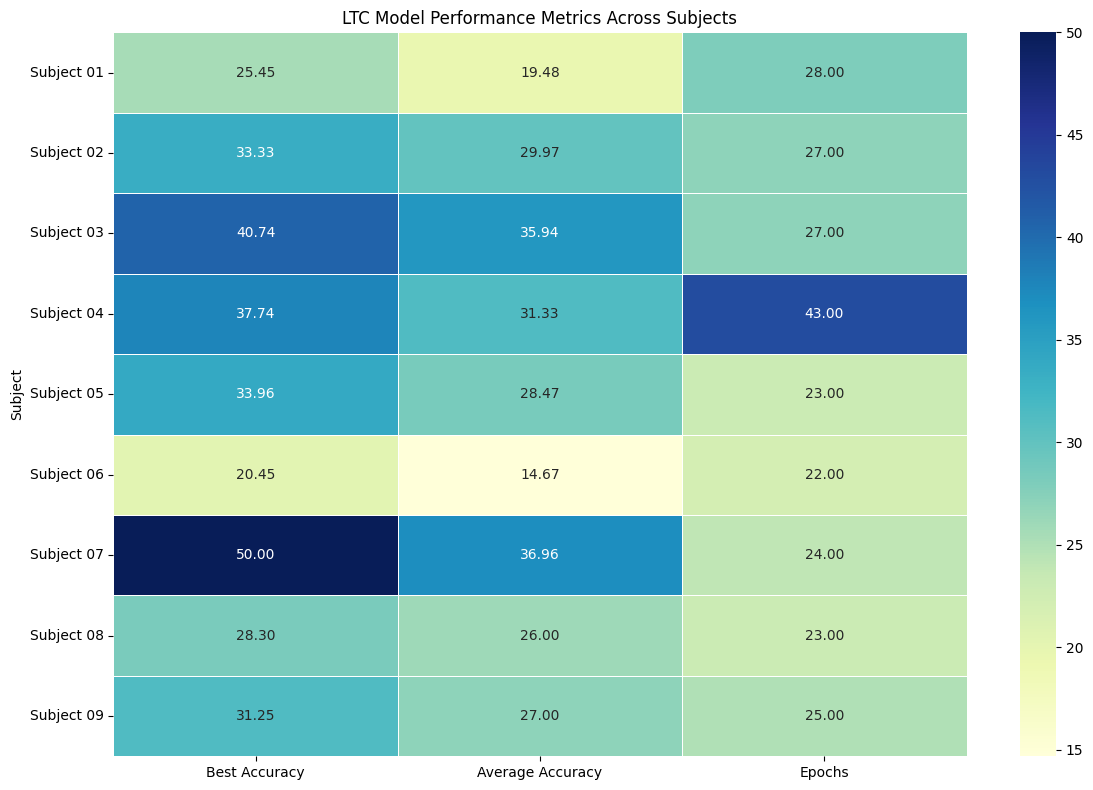

In [3]:
# Create a heatmap
plt.figure(figsize=(12, 8))

# Prepare data for heatmap
heatmap_data = df.set_index('Subject')
heatmap_data = heatmap_data.reindex(columns=['Best Accuracy', 'Average Accuracy', 'Epochs'])

# Create the heatmap
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=.5)
plt.title('LTC Model Performance Metrics Across Subjects')
plt.tight_layout()
plt.savefig('ltc_metrics_heatmap.png', dpi=300)
plt.show()


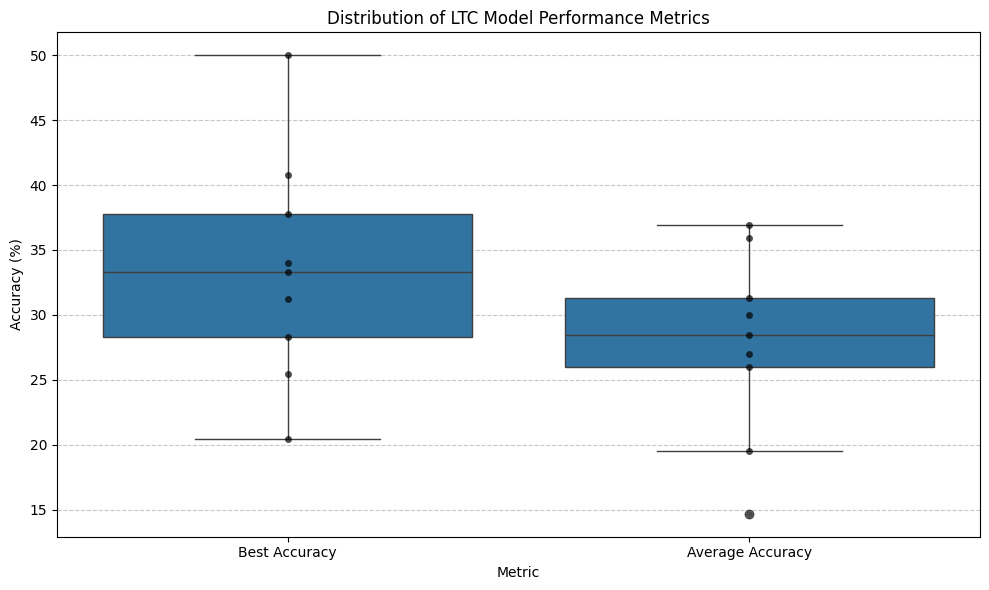

In [4]:
# Create a boxplot for accuracy distributions
plt.figure(figsize=(10, 6))
accuracy_data = pd.melt(df, id_vars=['Subject'], 
                        value_vars=['Best Accuracy', 'Average Accuracy'],
                        var_name='Metric', value_name='Accuracy')

sns.boxplot(x='Metric', y='Accuracy', data=accuracy_data)
sns.swarmplot(x='Metric', y='Accuracy', data=accuracy_data, color='black', alpha=0.7)

plt.title('Distribution of LTC Model Performance Metrics')
plt.ylabel('Accuracy (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('ltc_accuracy_distribution.png', dpi=300)
plt.show()


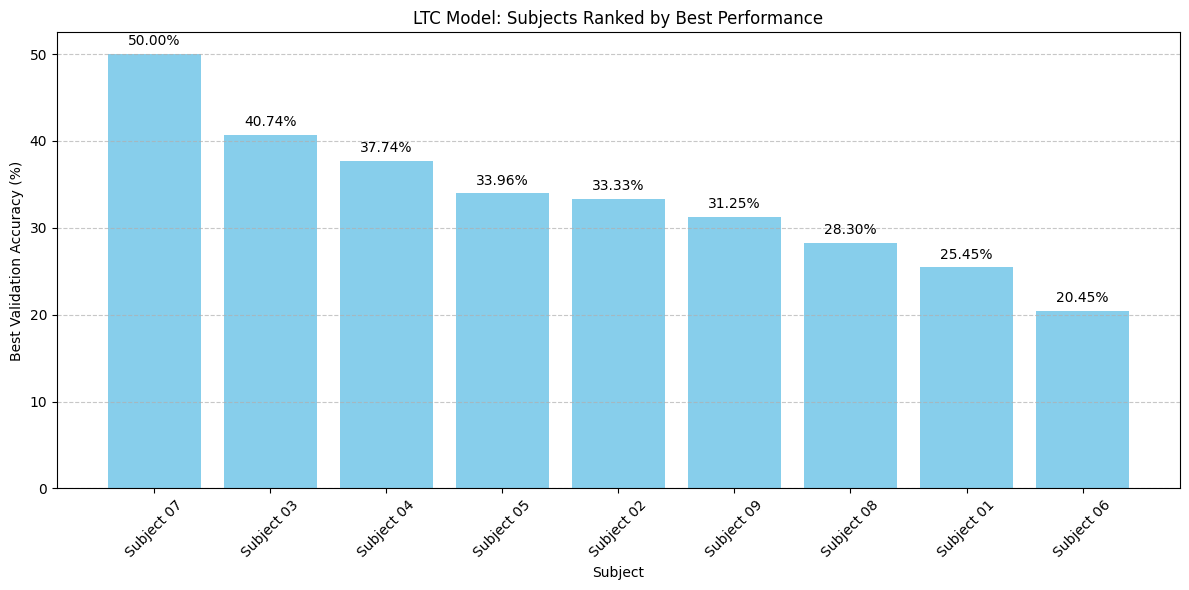

In [5]:
# Sort subjects by best accuracy
sorted_df = df.sort_values('Best Accuracy', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.bar(sorted_df['Subject'], sorted_df['Best Accuracy'], color='skyblue')
plt.xlabel('Subject')
plt.ylabel('Best Validation Accuracy (%)')
plt.title('LTC Model: Subjects Ranked by Best Performance')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for i, v in enumerate(sorted_df['Best Accuracy']):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center')

plt.tight_layout()
plt.savefig('ltc_subject_ranking.png', dpi=300)
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_34236\65520656.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df['Subject'], rotation=45)


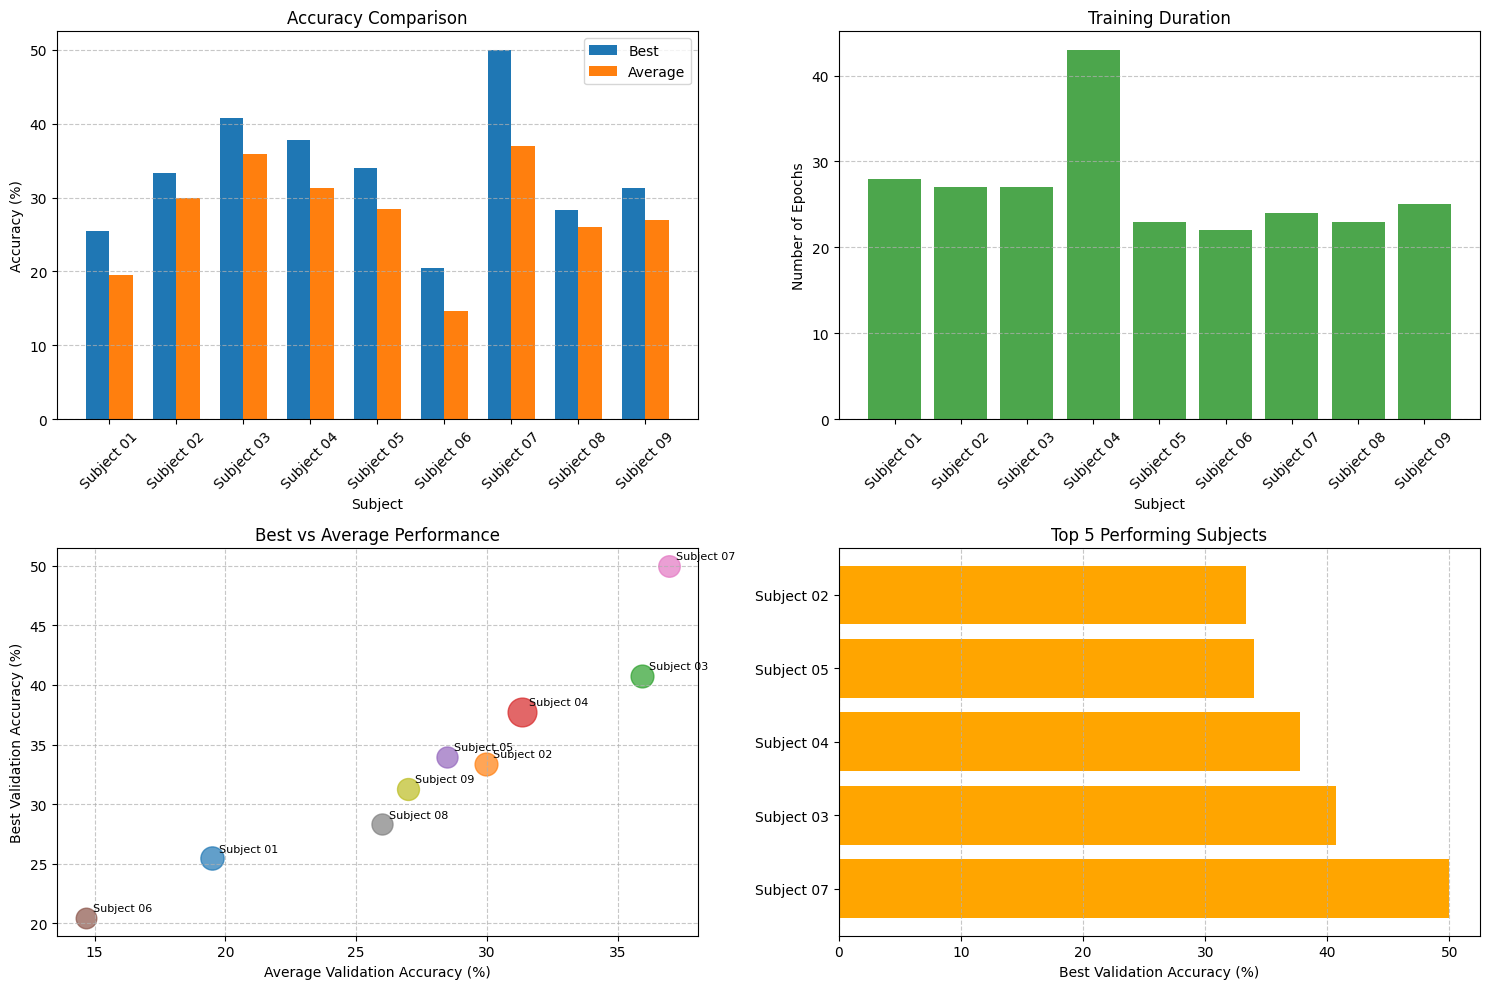

In [6]:
from matplotlib.gridspec import GridSpec

# Create a dashboard with multiple plots
plt.figure(figsize=(15, 10))
gs = GridSpec(2, 2, figure=plt.gcf())

# Plot 1: Bar chart comparison (top left)
ax1 = plt.subplot(gs[0, 0])
x = np.arange(len(df['Subject']))
width = 0.35
ax1.bar(x - width/2, df['Best Accuracy'], width, label='Best')
ax1.bar(x + width/2, df['Average Accuracy'], width, label='Average')
ax1.set_xlabel('Subject')
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Accuracy Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(df['Subject'], rotation=45)
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Epochs bar chart (top right)
ax2 = plt.subplot(gs[0, 1])
ax2.bar(df['Subject'], df['Epochs'], color='green', alpha=0.7)
ax2.set_xlabel('Subject')
ax2.set_ylabel('Number of Epochs')
ax2.set_title('Training Duration')
ax2.set_xticklabels(df['Subject'], rotation=45)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 3: Scatterplot of best vs avg (bottom left)
ax3 = plt.subplot(gs[1, 0])
for i, subj in enumerate(df['Subject']):
    ax3.scatter(df['Average Accuracy'][i], df['Best Accuracy'][i], 
               s=df['Epochs'][i]*10, alpha=0.7)
    ax3.annotate(subj, (df['Average Accuracy'][i], df['Best Accuracy'][i]),
                xytext=(5, 5), textcoords='offset points', fontsize=8)
ax3.set_xlabel('Average Validation Accuracy (%)')
ax3.set_ylabel('Best Validation Accuracy (%)')
ax3.set_title('Best vs Average Performance')
ax3.grid(True, linestyle='--', alpha=0.7)

# Plot 4: Best performers barplot (bottom right)
ax4 = plt.subplot(gs[1, 1])
top_df = df.sort_values('Best Accuracy', ascending=False).head(5)
ax4.barh(top_df['Subject'], top_df['Best Accuracy'], color='orange')
ax4.set_xlabel('Best Validation Accuracy (%)')
ax4.set_title('Top 5 Performing Subjects')
ax4.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('ltc_performance_dashboard.png', dpi=300)
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_34236\1104612924.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df['Subject'], rotation=45)


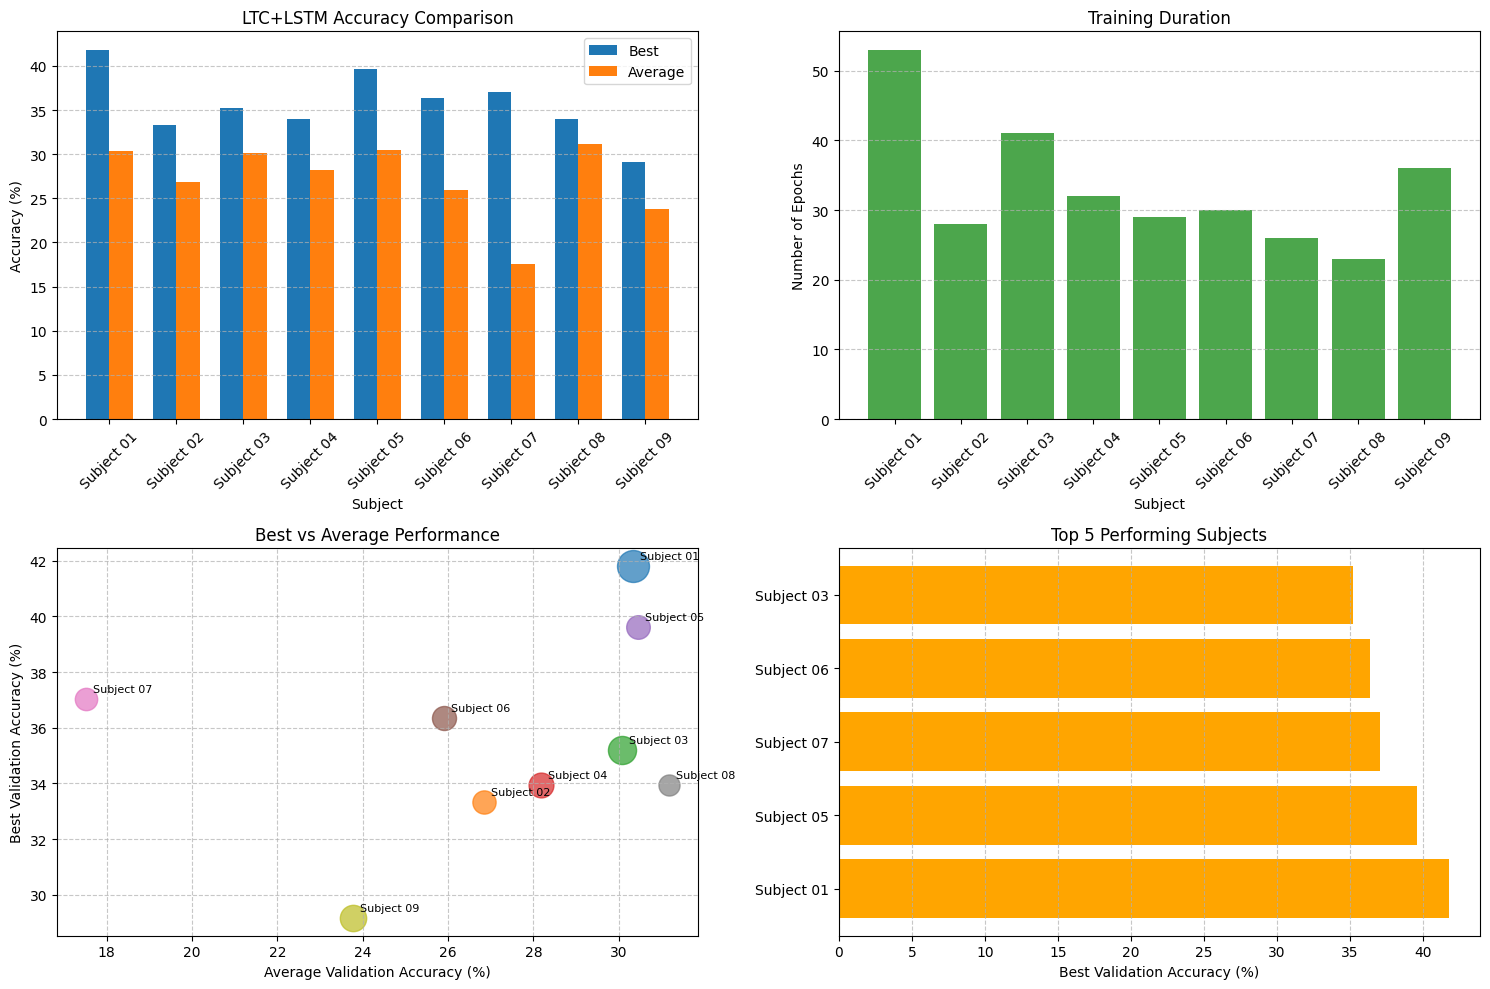

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec

# Create a DataFrame with your LTC+LSTM model results
data = {
    'Subject': [f'Subject {i:02d}' for i in range(1, 10)],
    'Best Accuracy': [41.82, 33.33, 35.19, 33.96, 39.62, 36.36, 37.04, 33.96, 29.17],
    'Average Accuracy': [30.33, 26.85, 30.08, 28.18, 30.45, 25.91, 17.52, 31.17, 23.78],
    'Epochs': [53, 28, 41, 32, 29, 30, 26, 23, 36]
}

df = pd.DataFrame(data)

# Create a dashboard with multiple plots
plt.figure(figsize=(15, 10))
gs = GridSpec(2, 2, figure=plt.gcf())

# Plot 1: Bar chart comparison (top left)
ax1 = plt.subplot(gs[0, 0])
x = np.arange(len(df['Subject']))
width = 0.35
ax1.bar(x - width/2, df['Best Accuracy'], width, label='Best')
ax1.bar(x + width/2, df['Average Accuracy'], width, label='Average')
ax1.set_xlabel('Subject')
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('LTC+LSTM Accuracy Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(df['Subject'], rotation=45)
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Epochs bar chart (top right)
ax2 = plt.subplot(gs[0, 1])
ax2.bar(df['Subject'], df['Epochs'], color='green', alpha=0.7)
ax2.set_xlabel('Subject')
ax2.set_ylabel('Number of Epochs')
ax2.set_title('Training Duration')
ax2.set_xticklabels(df['Subject'], rotation=45)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 3: Scatterplot of best vs avg (bottom left)
ax3 = plt.subplot(gs[1, 0])
for i, subj in enumerate(df['Subject']):
    ax3.scatter(df['Average Accuracy'][i], df['Best Accuracy'][i], 
               s=df['Epochs'][i]*10, alpha=0.7)
    ax3.annotate(subj, (df['Average Accuracy'][i], df['Best Accuracy'][i]),
                xytext=(5, 5), textcoords='offset points', fontsize=8)
ax3.set_xlabel('Average Validation Accuracy (%)')
ax3.set_ylabel('Best Validation Accuracy (%)')
ax3.set_title('Best vs Average Performance')
ax3.grid(True, linestyle='--', alpha=0.7)

# Plot 4: Best performers barplot (bottom right)
ax4 = plt.subplot(gs[1, 1])
top_df = df.sort_values('Best Accuracy', ascending=False).head(5)
ax4.barh(top_df['Subject'], top_df['Best Accuracy'], color='orange')
ax4.set_xlabel('Best Validation Accuracy (%)')
ax4.set_title('Top 5 Performing Subjects')
ax4.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('ltc_lstm_performance_dashboard.png', dpi=300)
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_34236\881350351.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df['Subject'], rotation=45)


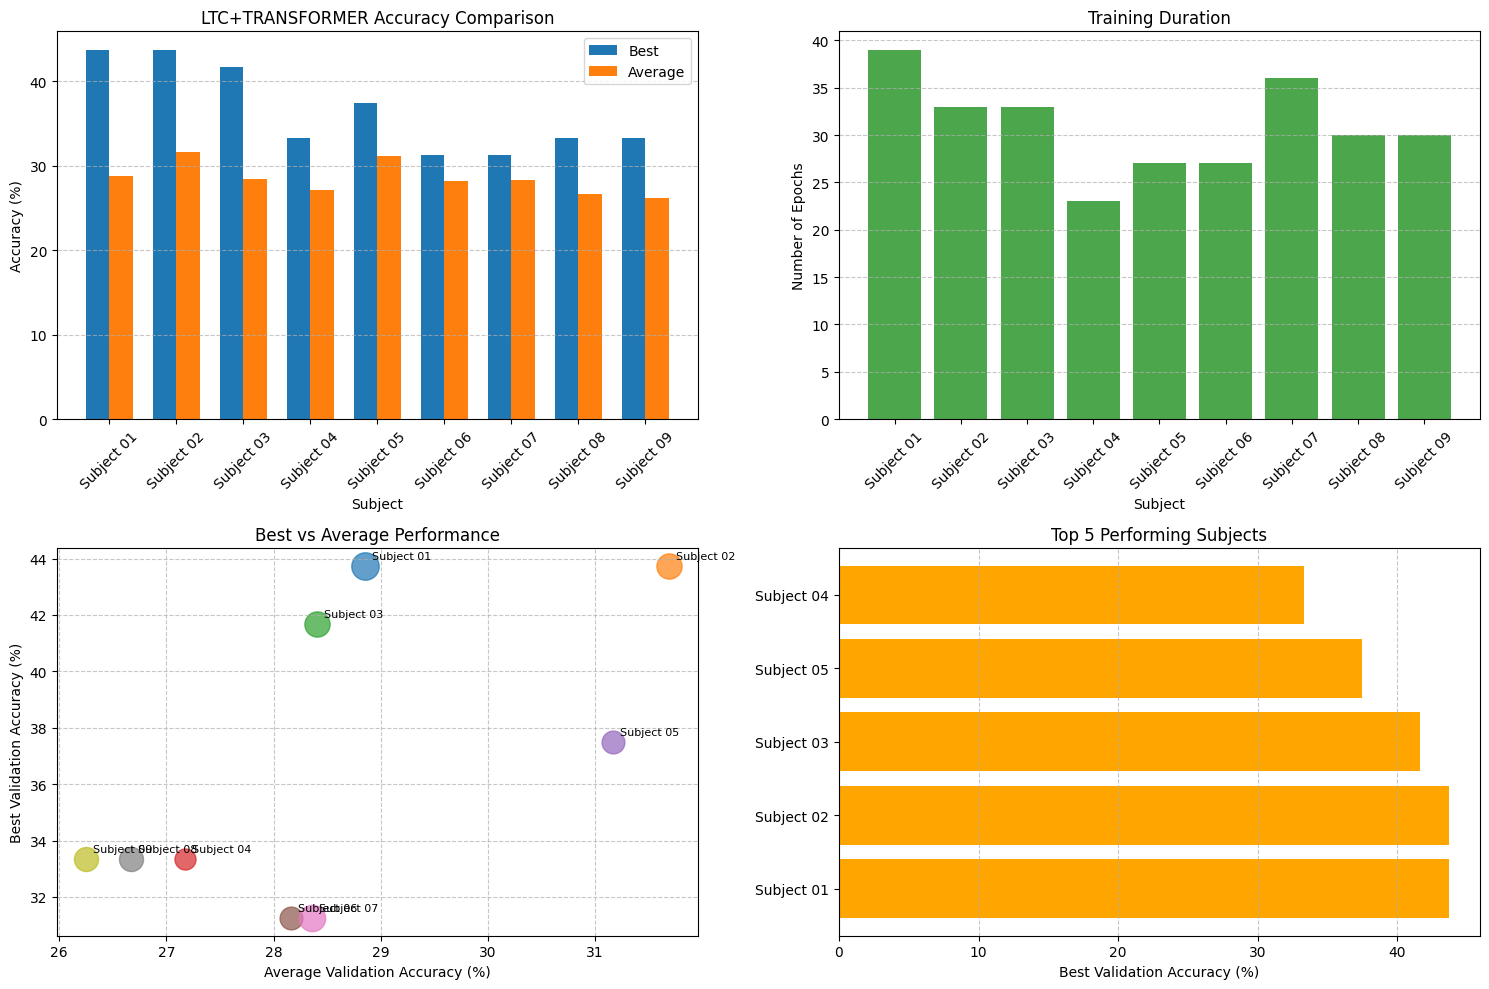

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Create a DataFrame with LTC+TRANSFORMER model results
data = {
    'Subject': [f'Subject {i:02d}' for i in range(1, 10)],
    'Best Accuracy': [43.75, 43.75, 41.67, 33.33, 37.50, 31.25, 31.25, 33.33, 33.33],
    'Average Accuracy': [28.85, 31.69, 28.41, 27.17, 31.17, 28.16, 28.36, 26.67, 26.25],
    'Epochs': [39, 33, 33, 23, 27, 27, 36, 30, 30]
}

df = pd.DataFrame(data)

# Create a dashboard with multiple plots
plt.figure(figsize=(15, 10))
gs = GridSpec(2, 2, figure=plt.gcf())

# Plot 1: Bar chart comparison (top left)
ax1 = plt.subplot(gs[0, 0])
x = np.arange(len(df['Subject']))
width = 0.35
ax1.bar(x - width/2, df['Best Accuracy'], width, label='Best')
ax1.bar(x + width/2, df['Average Accuracy'], width, label='Average')
ax1.set_xlabel('Subject')
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('LTC+TRANSFORMER Accuracy Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(df['Subject'], rotation=45)
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Epochs bar chart (top right)
ax2 = plt.subplot(gs[0, 1])
ax2.bar(df['Subject'], df['Epochs'], color='green', alpha=0.7)
ax2.set_xlabel('Subject')
ax2.set_ylabel('Number of Epochs')
ax2.set_title('Training Duration')
ax2.set_xticklabels(df['Subject'], rotation=45)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 3: Scatterplot of best vs avg (bottom left)
ax3 = plt.subplot(gs[1, 0])
for i, subj in enumerate(df['Subject']):
    ax3.scatter(df['Average Accuracy'][i], df['Best Accuracy'][i], 
               s=df['Epochs'][i]*10, alpha=0.7)
    ax3.annotate(subj, (df['Average Accuracy'][i], df['Best Accuracy'][i]),
                xytext=(5, 5), textcoords='offset points', fontsize=8)
ax3.set_xlabel('Average Validation Accuracy (%)')
ax3.set_ylabel('Best Validation Accuracy (%)')
ax3.set_title('Best vs Average Performance')
ax3.grid(True, linestyle='--', alpha=0.7)

# Plot 4: Best performers barplot (bottom right)
ax4 = plt.subplot(gs[1, 1])
top_df = df.sort_values('Best Accuracy', ascending=False).head(5)
ax4.barh(top_df['Subject'], top_df['Best Accuracy'], color='orange')
ax4.set_xlabel('Best Validation Accuracy (%)')
ax4.set_title('Top 5 Performing Subjects')
ax4.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('ltc_transformer_performance_dashboard.png', dpi=300)
plt.show()


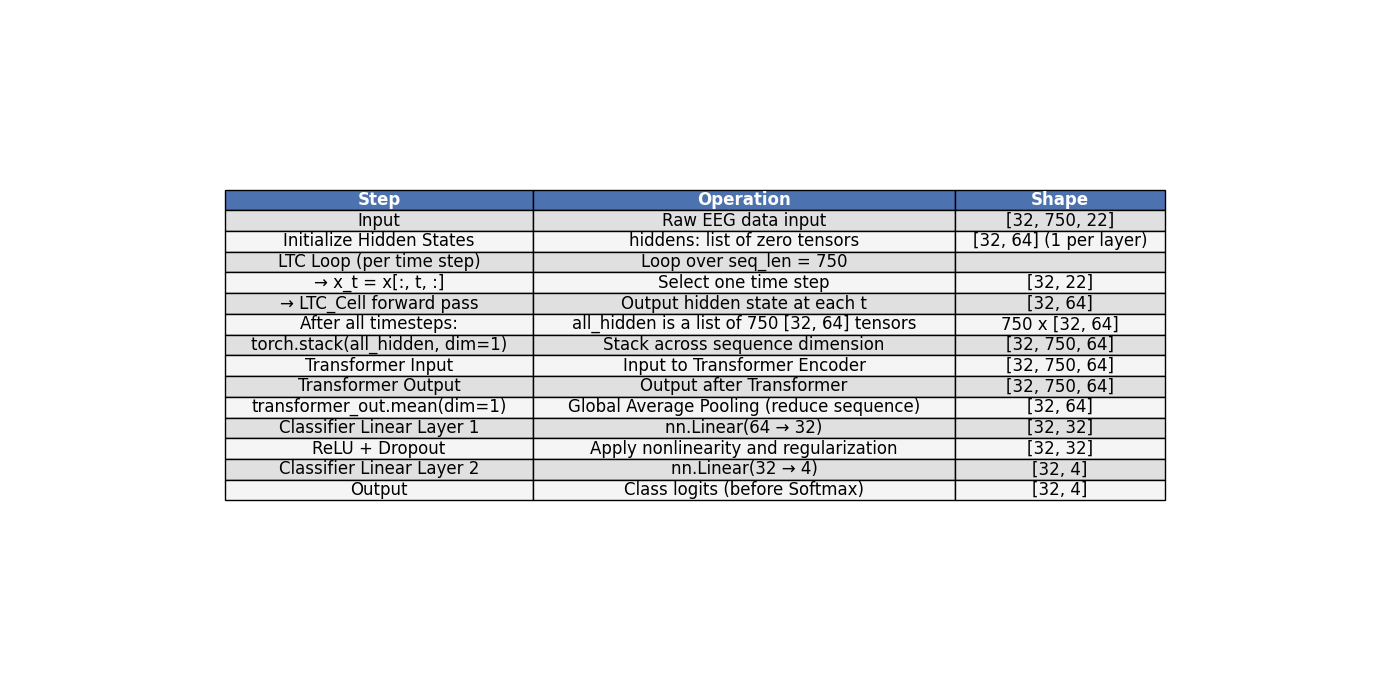

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the step-by-step data
data = [
    ("Input", "Raw EEG data input", "[32, 750, 22]"),
    ("Initialize Hidden States", "hiddens: list of zero tensors", "[32, 64] (1 per layer)"),
    ("LTC Loop (per time step)", "Loop over seq_len = 750", ""),
    ("→ x_t = x[:, t, :]", "Select one time step", "[32, 22]"),
    ("→ LTC_Cell forward pass", "Output hidden state at each t", "[32, 64]"),
    ("After all timesteps:", "all_hidden is a list of 750 [32, 64] tensors", "750 x [32, 64]"),
    ("torch.stack(all_hidden, dim=1)", "Stack across sequence dimension", "[32, 750, 64]"),
    ("Transformer Input", "Input to Transformer Encoder", "[32, 750, 64]"),
    ("Transformer Output", "Output after Transformer", "[32, 750, 64]"),
    ("transformer_out.mean(dim=1)", "Global Average Pooling (reduce sequence)", "[32, 64]"),
    ("Classifier Linear Layer 1", "nn.Linear(64 → 32)", "[32, 32]"),
    ("ReLU + Dropout", "Apply nonlinearity and regularization", "[32, 32]"),
    ("Classifier Linear Layer 2", "nn.Linear(32 → 4)", "[32, 4]"),
    ("Output", "Class logits (before Softmax)", "[32, 4]")
]

# Create a DataFrame
df = pd.DataFrame(data, columns=["Step", "Operation", "Shape"])

# Plot settings for high quality
fig, ax = plt.subplots(figsize=(14, 7))
ax.axis('off')

# Create the table in matplotlib
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center'
)

# Style adjustments
table.auto_set_font_size(False)
table.set_fontsize(12)

# Bold header row
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#4C72B0')  # dark blue header
    else:
        cell.set_facecolor('#F5F5F5' if row % 2 == 0 else '#E0E0E0')  # alternate row shading

# Make columns a bit wider
table.auto_set_column_width(col=list(range(len(df.columns))))

plt.tight_layout()

# Save as image (optional, for PPT use)
# plt.savefig("model_shape_flow.png", dpi=300)

plt.show()


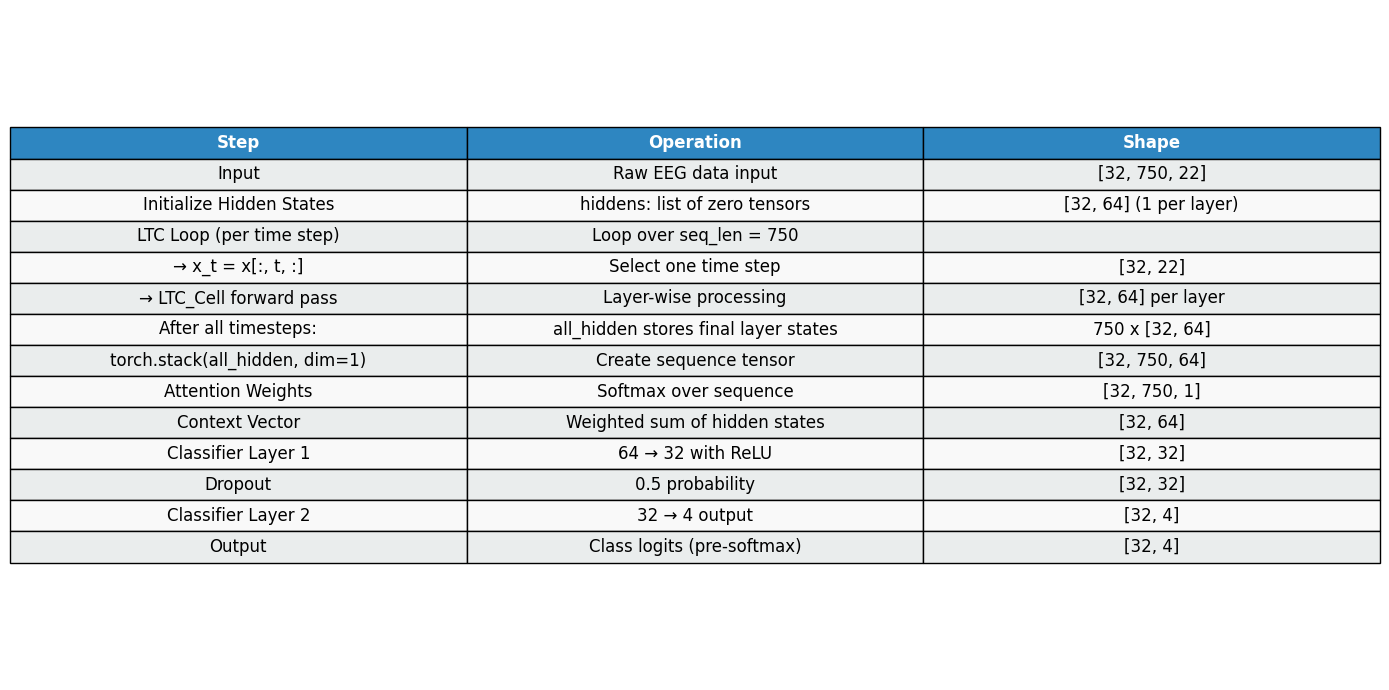

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the step-by-step data for EnhancedLTC
enhanced_data = [
    ("Input", "Raw EEG data input", "[32, 750, 22]"),
    ("Initialize Hidden States", "hiddens: list of zero tensors", "[32, 64] (1 per layer)"),
    ("LTC Loop (per time step)", "Loop over seq_len = 750", ""),
    ("→ x_t = x[:, t, :]", "Select one time step", "[32, 22]"),
    ("→ LTC_Cell forward pass", "Layer-wise processing", "[32, 64] per layer"),
    ("After all timesteps:", "all_hidden stores final layer states", "750 x [32, 64]"),
    ("torch.stack(all_hidden, dim=1)", "Create sequence tensor", "[32, 750, 64]"),
    ("Attention Weights", "Softmax over sequence", "[32, 750, 1]"),
    ("Context Vector", "Weighted sum of hidden states", "[32, 64]"),
    ("Classifier Layer 1", "64 → 32 with ReLU", "[32, 32]"),
    ("Dropout", "0.5 probability", "[32, 32]"),
    ("Classifier Layer 2", "32 → 4 output", "[32, 4]"),
    ("Output", "Class logits (pre-softmax)", "[32, 4]")
]

# Create DataFrame
df_enhanced = pd.DataFrame(enhanced_data, columns=["Step", "Operation", "Shape"])

# Plot settings
fig, ax = plt.subplots(figsize=(14, 7))
ax.axis('off')

# Create table
table = ax.table(
    cellText=df_enhanced.values,
    colLabels=df_enhanced.columns,
    cellLoc='center',
    loc='center'
)

# Style adjustments
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

# Header styling
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#2E86C1')  # Updated blue shade
    else:
        cell.set_facecolor('#F9F9F9' if row % 2 == 0 else '#EAEDED')

plt.tight_layout()
plt.show()


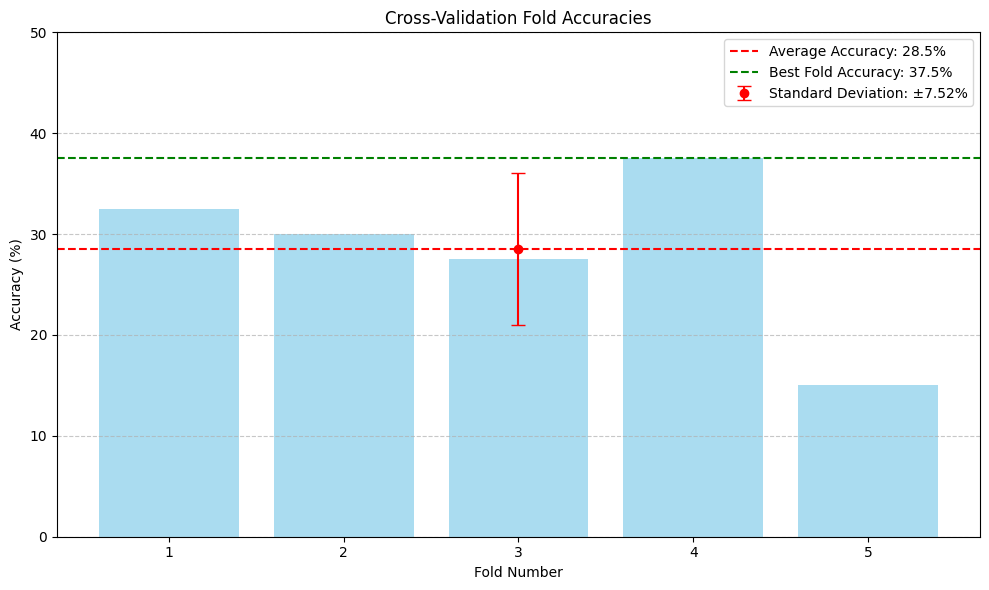

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
fold_accuracies = [32.50, 30.00, 27.50, 37.50, 15.00]
avg_accuracy = 28.50
std_dev = 7.52
best_accuracy = 37.50

# Plotting
folds = np.arange(1, len(fold_accuracies) + 1)

plt.figure(figsize=(10, 6))
plt.bar(folds, fold_accuracies, color='skyblue', alpha=0.7)
plt.axhline(y=avg_accuracy, color='r', linestyle='--', label=f'Average Accuracy: {avg_accuracy}%')
plt.axhline(y=best_accuracy, color='g', linestyle='--', label=f'Best Fold Accuracy: {best_accuracy}%')

plt.errorbar(3, avg_accuracy, yerr=std_dev, fmt='o', color='r', capsize=5, label=f'Standard Deviation: ±{std_dev}%')

plt.title('Cross-Validation Fold Accuracies')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy (%)')
plt.xticks(folds)
plt.ylim(0, 50)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('cross_validation_accuracies.png')
plt.show()


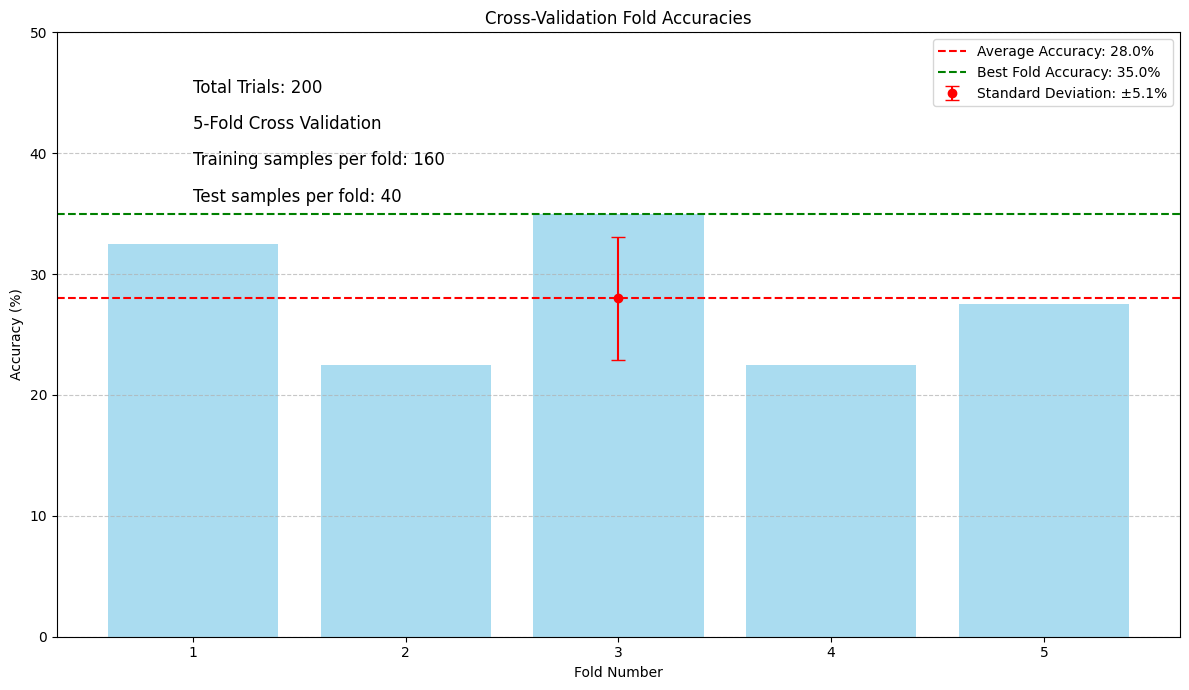

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data
fold_accuracies = [32.50, 22.50, 35.00, 22.50, 27.50]
avg_accuracy = 28.00
std_dev = 5.10
best_accuracy = 35.00

# Additional details
num_trials = 200
folds = np.arange(1, len(fold_accuracies) + 1)
train_samples = 160
test_samples = 40

plt.figure(figsize=(12, 7))
plt.bar(folds, fold_accuracies, color='skyblue', alpha=0.7)
plt.axhline(y=avg_accuracy, color='r', linestyle='--', label=f'Average Accuracy: {avg_accuracy}%')
plt.axhline(y=best_accuracy, color='g', linestyle='--', label=f'Best Fold Accuracy: {best_accuracy}%')
plt.errorbar(3, avg_accuracy, yerr=std_dev, fmt='o', color='r', capsize=5, label=f'Standard Deviation: ±{std_dev}%')

# Adding text details about trials and fold data split
plt.text(1, 45, f'Total Trials: {num_trials}', fontsize=12, color='black')
plt.text(1, 42, f'5-Fold Cross Validation', fontsize=12, color='black')
plt.text(1, 39, f'Training samples per fold: {train_samples}', fontsize=12, color='black')
plt.text(1, 36, f'Test samples per fold: {test_samples}', fontsize=12, color='black')

plt.title('Cross-Validation Fold Accuracies')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy (%)')
plt.xticks(folds)
plt.ylim(0, 50)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('cross_validation_accuracies_with_details.png')
plt.show()


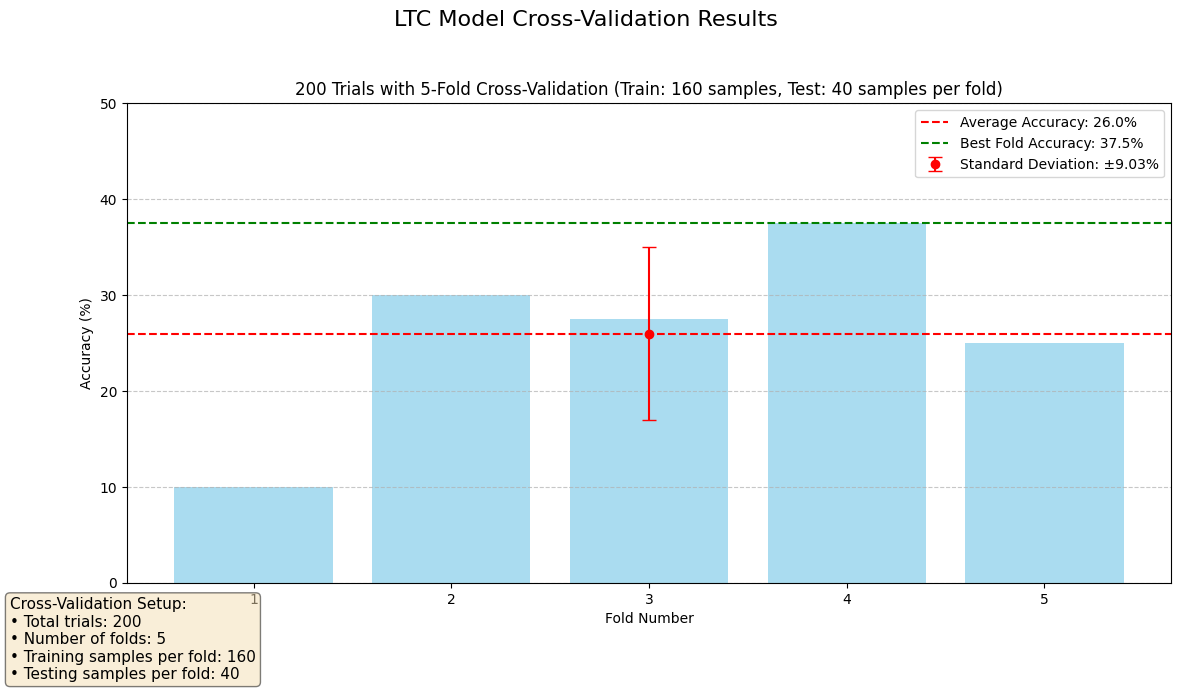

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data
fold_accuracies = [10.00, 30.00, 27.50, 37.50, 25.00]
avg_accuracy = 26.00
std_dev = 9.03
best_accuracy = 37.50

# Additional details
num_trials = 200
num_folds = 5
train_samples_per_fold = 160
test_samples_per_fold = 40

# Plotting
folds = np.arange(1, len(fold_accuracies) + 1)

plt.figure(figsize=(12, 7))
plt.bar(folds, fold_accuracies, color='skyblue', alpha=0.7)
plt.axhline(y=avg_accuracy, color='r', linestyle='--', label=f'Average Accuracy: {avg_accuracy}%')
plt.axhline(y=best_accuracy, color='g', linestyle='--', label=f'Best Fold Accuracy: {best_accuracy}%')

plt.errorbar(3, avg_accuracy, yerr=std_dev, fmt='o', color='r', capsize=5, label=f'Standard Deviation: ±{std_dev}%')

# Add title with experiment details
plt.suptitle('LTC Model Cross-Validation Results', fontsize=16)
plt.title(f'200 Trials with 5-Fold Cross-Validation (Train: 160 samples, Test: 40 samples per fold)', 
          fontsize=12)

# Add text box with fold information
fold_info = (f"Cross-Validation Setup:\n"
             f"• Total trials: {num_trials}\n"
             f"• Number of folds: {num_folds}\n"
             f"• Training samples per fold: {train_samples_per_fold}\n"
             f"• Testing samples per fold: {test_samples_per_fold}")

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.02, 0.02, fold_info, transform=plt.gcf().transFigure, 
         fontsize=11, verticalalignment='bottom', bbox=props)

plt.xlabel('Fold Number')
plt.ylabel('Accuracy (%)')
plt.xticks(folds)
plt.ylim(0, 50)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig('cross_validation_accuracies.png', dpi=300)
plt.show()
